In [50]:
%matplotlib qt

# std
import os
from os import path
import time

# 3p
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# prj
os.chdir("..")
from src import helpers, configuration, filtering, bandpower, plots, statistics as stats
from src.configuration import cfg
os.chdir('analysis-adelie')

# statistics
from scipy.stats import ttest_ind

# plots
import matplotlib

font = {'family':'DejaVu Sans', 'weight':'normal', 'size':20}
matplotlib.rc('font', **font)

In [48]:
def get_concat_signal(data_type, subject="adelie", config=cfg):
    dfs = [
        helpers.load_signal_data(data_type, subject=subject, recording=recording, config=config)
        for recording in range(
            len(config["paths"]["subjects"][subject]["recordings"][data_type])
        )
    ]

    for i in range(len(dfs) - 1):
        dfs[i + 1].index += dfs[i].index.max()

    concatenated = pd.concat(dfs)
    return concatenated

## Adélie: eigenvalues and PCA

### 1st metric: sum of the five highest eigenvalues

In [4]:
# get baseline and information Adélie 
baseline_adelie = get_concat_signal('baseline')
baseline_adelie_information = stats.get_information(baseline_adelie)

# get meditation and information Adélie
meditation_adelie = get_concat_signal('meditation')
meditation_adelie_information = stats.get_information(meditation_adelie)

In [5]:
# ttest over all electrodes
concat_adelie_information = pd.concat([baseline_adelie_information, meditation_adelie_information], keys=['baseline', 'meditation'])
ttest_adelie_information = concat_adelie_information.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))

In [6]:
ttest_adelie_information

Ttest_indResult(statistic=-0.30476290676964746, pvalue=0.7620173308167895)

Text(0.5, 1.0, 'First metric: sum of the five highest eigenvalues / Adélie')

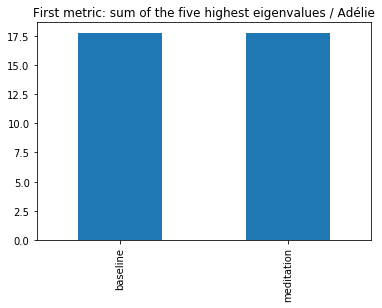

In [11]:
# plot
concat_adelie_information.mean(level=0).transpose().plot.bar()
plt.title("First metric: sum of the five highest eigenvalues / Adélie")

### 2nd metric: normalized sum of the five highest eigenvalues

In [7]:
# get baseline and normalized information Adélie 
baseline_adelie = get_concat_signal('baseline')
baseline_adelie_norm_information = stats.get_norm_information(baseline_adelie)

# get meditation and normalized information Adélie
meditation_adelie = get_concat_signal('meditation')
meditation_adelie_norm_information = stats.get_norm_information(meditation_adelie)

In [8]:
# ttest over all electrodes
concat_adelie_norm_information = pd.concat([baseline_adelie_norm_information, meditation_adelie_norm_information], keys=['baseline', 'meditation'])
ttest_adelie_norm_information = concat_adelie_norm_information.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))

In [9]:
ttest_adelie_norm_information

Ttest_indResult(statistic=-0.30476290676964884, pvalue=0.7620173308167885)

Text(0.5, 1.0, 'First metric: sum of the normalized five highest eigenvalues / Adélie')

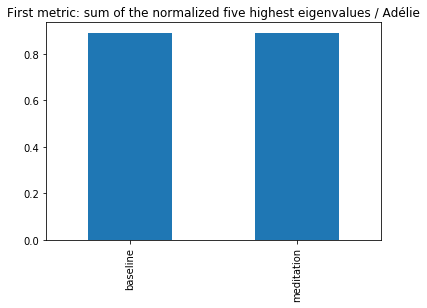

In [15]:
# plot
concat_adelie_norm_information.mean(level=0).transpose().plot.bar()
plt.title("First metric: sum of the normalized five highest eigenvalues / Adélie")

### 3rd metric: spectrum, distribution of all normalized eigenvalues

In [10]:
# get baseline and normalized distribution Adélie
baseline_adelie = get_concat_signal('baseline', subject='adelie')
baseline_adelie_distribution = stats.get_distrib_information(baseline_adelie)

# get meditation and normalized distribution Adélie
meditation_adelie = get_concat_signal('meditation', subject='adelie')
meditation_adelie_distribution = stats.get_distrib_information(meditation_adelie)

In [11]:
# mean of ev over all epochs
baseline_adelie_distribution_mean = baseline_adelie_distribution.mean()
meditation_adelie_distribution_mean = meditation_adelie_distribution.mean()

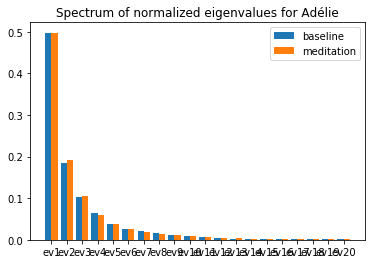

In [32]:
# bar plot
ev = ['ev1','ev2','ev3','ev4','ev5','ev6','ev7','ev8','ev9','ev10',
        'ev11','ev12','ev13','ev14','ev15','ev16','ev17','ev18','ev19','ev20']
%matplotlib qt
barWidth = 0.4

y1 = baseline_adelie_distribution_mean
y2 = meditation_adelie_distribution_mean
r1 = range(len(y1))
r2 = [x + barWidth for x in r1]

b1 = plt.bar(r1, y1, width = barWidth)
b2 = plt.bar(r2, y2, width = barWidth)

plt.xticks([r + barWidth / 2 for r in range(len(y1))], ev)

plt.title('Spectrum of normalized eigenvalues for Adélie')
plt.legend([b1, b2],['baseline', 'meditation'])

In [51]:
# plot
ev = ['ev1','ev2','ev3','ev4','ev5','ev6','ev7','ev8','ev9','ev10',
        'ev11','ev12','ev13','ev14','ev15','ev16','ev17','ev18','ev19','ev20']
%matplotlib qt

y1 = baseline_adelie_distribution_mean
y2 = meditation_adelie_distribution_mean
r1 = range(len(ev))
r2 = range(len(ev))

b1 = plt.plot(r1, y1, label='baseline', linewidth=2.5)
b2 = plt.plot(r2, y2, label='meditation', linewidth=2.5)

plt.xticks([r for r in range(len(ev))], ev)
plt.title('Spectrum of normalized eigenvalues for Adélie')
plt.legend()
plt.show()

## Sam: eigenvalues and PCA

### 1st metric: sum of the five highest eigenvalues

In [23]:
# get baseline Sam
baseline_sam = get_concat_signal('baseline', subject='sam')
baseline_sam_information = stats.get_information(baseline_sam)

# get meditation Sam
meditation_sam = get_concat_signal('meditation', subject='sam')
meditation_sam_information = stats.get_information(meditation_sam)

In [24]:
# ttest over all electrodes
concat_sam_information = pd.concat([baseline_sam_information, meditation_sam_information], keys=['baseline', 'meditation'])
ttest_sam_information = concat_sam_information.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))

In [25]:
ttest_sam_information

Ttest_indResult(statistic=2.8712933388578974, pvalue=0.005901815227511391)

Text(0.5, 1.0, 'First metric: sum of the five highest eigenvalues / Sam')

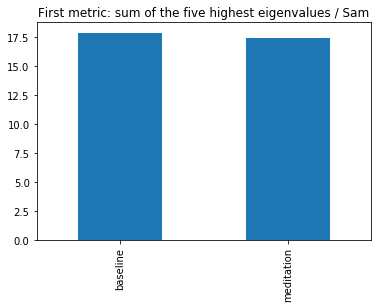

In [28]:
# plot
%matplotlib inline
concat_sam_information.mean(level=0).transpose().plot.bar()
plt.title("First metric: sum of the five highest eigenvalues / Sam")

### 2nd metric: normalized sum of the five highest eigenvalues

In [29]:
# get baseline and normalized information Sam
baseline_sam = get_concat_signal('baseline', subject='sam')
baseline_sam_norm_information = stats.get_norm_information(baseline_sam)

# get meditation and normalized information Sam
meditation_sam = get_concat_signal('meditation', subject='sam')
meditation_sam_norm_information = stats.get_norm_information(meditation_sam)

In [30]:
# ttest over all electrodes
concat_sam_norm_information = pd.concat([baseline_sam_norm_information, meditation_sam_norm_information], keys=['baseline', 'meditation'])
ttest_sam_norm_information = concat_sam_norm_information.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))

In [31]:
ttest_sam_norm_information

Ttest_indResult(statistic=2.871293338857912, pvalue=0.005901815227511152)

Text(0.5, 1.0, 'First metric: sum of the normalized five highest eigenvalues / Sam')

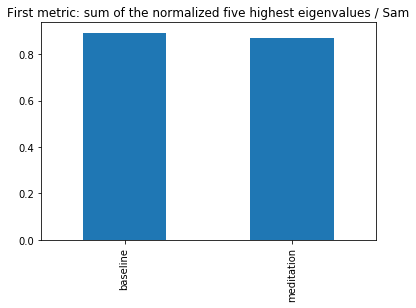

In [32]:
# plot
concat_sam_norm_information.mean(level=0).transpose().plot.bar()
plt.title("First metric: sum of the normalized five highest eigenvalues / Sam")

### 3rd metric: spectrum, distribution of all normalized eigenvalues

In [19]:
# get baseline and normalized distribution Sam
baseline_sam = get_concat_signal('baseline', subject='sam')
baseline_sam_distribution = stats.get_distrib_information(baseline_sam)

# get meditation and normalized distribution Sam
meditation_sam = get_concat_signal('meditation', subject='sam')
meditation_sam_distribution = stats.get_distrib_information(meditation_sam)

In [20]:
# mean of ev over all epochs
baseline_sam_distribution_mean = baseline_sam_distribution.mean()
meditation_sam_distribution_mean = meditation_sam_distribution.mean()

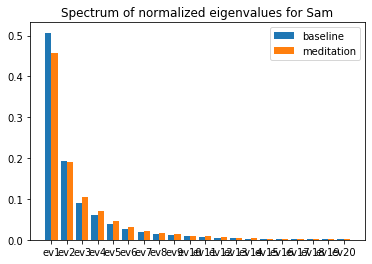

In [45]:
# bar plot
ev = ['ev1','ev2','ev3','ev4','ev5','ev6','ev7','ev8','ev9','ev10',
        'ev11','ev12','ev13','ev14','ev15','ev16','ev17','ev18','ev19','ev20']
%matplotlib inline
barWidth = 0.4

y1 = baseline_sam_distribution_mean
y2 = meditation_sam_distribution_mean
r1 = range(len(y1))
r2 = [x + barWidth for x in r1]

b1 = plt.bar(r1, y1, width = barWidth)
b2 = plt.bar(r2, y2, width = barWidth)

plt.xticks([r + barWidth / 2 for r in range(len(y1))], ev)

plt.title('Spectrum of normalized eigenvalues for Sam')
plt.legend([b1, b2],['baseline', 'meditation'])

In [52]:
# plot
ev = ['ev1','ev2','ev3','ev4','ev5','ev6','ev7','ev8','ev9','ev10',
        'ev11','ev12','ev13','ev14','ev15','ev16','ev17','ev18','ev19','ev20']
%matplotlib qt

y1 = baseline_sam_distribution_mean
y2 = meditation_sam_distribution_mean
r1 = range(len(ev))
r2 = range(len(ev))

b1 = plt.plot(r1, y1, label='baseline', linewidth=2.5)
b2 = plt.plot(r2, y2, label='meditation', linewidth=2.5)

plt.xticks([r for r in range(len(ev))], ev)
plt.title('Spectrum of normalized eigenvalues for Sam')
plt.legend()
plt.show()